<a href="https://colab.research.google.com/github/EricCallaway/COSC_5313_CNN_model_HW-5/blob/main/CNN_model_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary Libraries

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img_data_path_1 = "/content/drive/MyDrive/Data/HW#5_Dataset/imgs1/"
img_data_path_2 = "/content/drive/MyDrive/Data/HW#5_Dataset/imgs2/"
file_data = "/content/drive/MyDrive/Data/HW#5_Dataset/file_data.csv"
class_0_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_0.csv"
class_1_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_1.csv"
class_2_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_2.csv"
class_3_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_3.csv"


df = pd.read_csv(file_data)
df_class_0 = pd.read_csv(class_0_path)
df_class_1 = pd.read_csv(class_1_path)
df_class_2 = pd.read_csv(class_2_path)
df_class_3 = pd.read_csv(class_3_path)


seq_nums = df['seq_num'].values
file_name = df[' file_name'].values
class_label = df[' class_label'].values



In [5]:
# pip install split-folders

In [6]:
# import splitfolders
# input = '/content/drive/MyDrive/Data/HW#5_Dataset/imgs1'
# output = 'final_dataset'
# splitfolders.ratio(input, output=output, seed=1337, ratio=(.7, 0.15,0.15))

In [7]:
train_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/train/'
test_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/test/'
val_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/val/'

In [8]:
batch_size = 32
HEIGHT = 180
WIDTH = 180

In [9]:
import os
import cv2
x_train = []
for folder in os.listdir(train_path):
  sub_path = train_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_train.append(img_arr)



In [10]:
print(len(x_train))

3043


In [11]:
x_test = []
for folder in os.listdir(test_path):
  sub_path = test_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_test.append(img_arr)

In [12]:
print(len(x_test))

655


In [13]:
x_val = []
for folder in os.listdir(val_path):
  sub_path = val_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_val.append(img_arr)

In [14]:
print(len(x_val))

651


Turn our Train, Test, and Validation lists into numpy arrays.
Also normalize the values in the arrays between the values 0 and 1. We do this by dividing each element in the array by 255.

In [15]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)

train_x = train_x/255.0
test_x = test_x/255.0
val_x = val_x/255.0

Compute labels of corresponding datasets using ImgageDataGenerator. We use this because our images are stored in folders. We must walk through the folders and find out the corresoponding labels of images stored here. 

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (HEIGHT, WIDTH),
                                                 batch_size = batch_size,
                                                 class_mode = 'sparse',
                                                 classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (HEIGHT, WIDTH),
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (HEIGHT, WIDTH),
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})

Found 3043 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 651 images belonging to 4 classes.


In [18]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

This shows the indicies of each class.

In [19]:
val_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

In [20]:
test_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

In [21]:
training_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

Shape of each set. Notice they are all 1D arrays

In [22]:
train_y.shape

(3043,)

In [23]:
test_y.shape

(655,)

In [24]:
val_y.shape

(651,)

Build the Model

In [29]:
num_classes= 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Applying Early Stopping to avoid overfitting of the model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

Compile the Model

In [33]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)       

Fit the Model

In [34]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=batch_size,shuffle=True)

Epoch 1/10
96/96 [==============================] - 119s 1s/step - loss: 0.7834 - accuracy: 0.7874 - val_loss: 0.7373 - val_accuracy: 0.7942
Epoch 2/10
96/96 [==============================] - 117s 1s/step - loss: 0.7416 - accuracy: 0.7936 - val_loss: 0.7423 - val_accuracy: 0.7942
Epoch 3/10
96/96 [==============================] - 118s 1s/step - loss: 0.7369 - accuracy: 0.7936 - val_loss: 0.7406 - val_accuracy: 0.7942
Epoch 4/10
96/96 [==============================] - 118s 1s/step - loss: 0.7323 - accuracy: 0.7936 - val_loss: 0.7299 - val_accuracy: 0.7942
Epoch 5/10
96/96 [==============================] - 116s 1s/step - loss: 0.7296 - accuracy: 0.7936 - val_loss: 0.7015 - val_accuracy: 0.7942
Epoch 6/10
96/96 [==============================] - 118s 1s/step - loss: 0.7439 - accuracy: 0.7936 - val_loss: 0.7405 - val_accuracy: 0.7942
Epoch 7/10
96/96 [==============================] - 117s 1s/step - loss: 0.7402 - accuracy: 0.7936 - val_loss: 0.7260 - val_accuracy: 0.7942
Epoch 8/10
96

Visualizing Loss and Accuracy

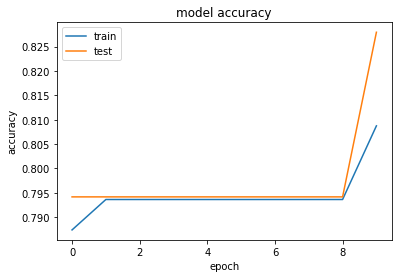

In [37]:
#Summarizing History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

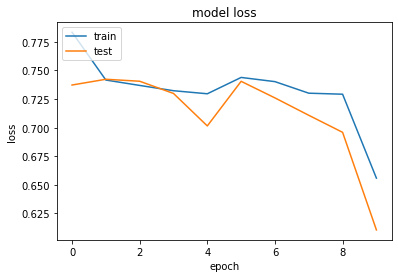

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()